# 1. Data Collection & Exploration:

### # Step 1.1: Load and inspect the dataset

In [1]:
import pandas as pd

df = pd.read_csv("NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

print("Shape of the dataset:", df.shape)
df.head()

Shape of the dataset: (7787, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Step 1.2: Identify missing values and data types

In [46]:
print("\nMissing values in each column:")
print(df.isnull().sum())

print("\nData types:")
print(df.dtypes)

duplicate_count = df.duplicated().sum()
print("\nNumber of duplicate records:", duplicate_count)


Missing values in each column:
show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
description      0
duration_int     0
duration_type    0
content_age      0
genre_count      0
Cluster          0
dtype: int64

Data types:
show_id          object
type             object
title            object
director         object
cast             object
country          object
date_added       object
release_year      int64
rating           object
duration         object
listed_in        object
description      object
duration_int      int64
duration_type    object
content_age       int64
genre_count       int64
Cluster           int32
dtype: object

Number of duplicate records: 0


### Step 1.3: Exploratory Data Analysis (EDA)

C:\Users\sudarshan\AppData\Local\Temp\ipykernel_15868\940007628.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='pastel')


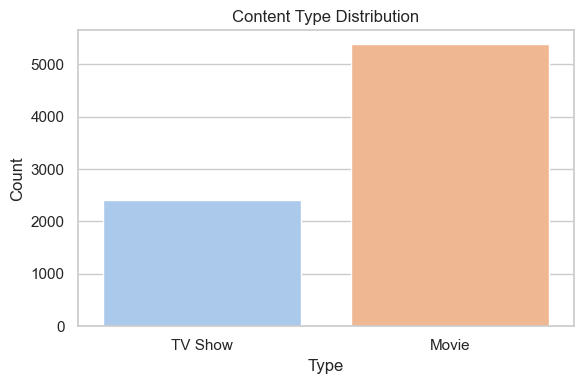

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

sns.set(style="whitegrid")

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', palette='pastel')
plt.title('Content Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Distribution of Release Years

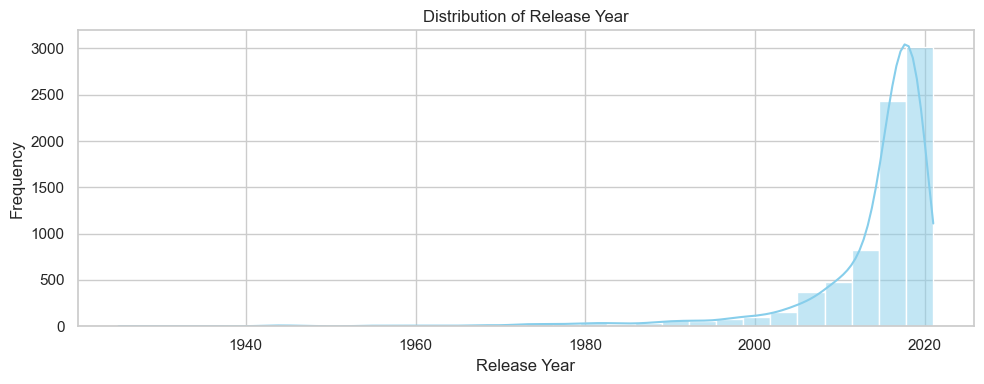

In [4]:
plt.figure(figsize=(10,4))
sns.histplot(data=df, x='release_year', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Release Year')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Top 10 Countries by Content Count

C:\Users\sudarshan\AppData\Local\Temp\ipykernel_15868\3737257597.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='muted')


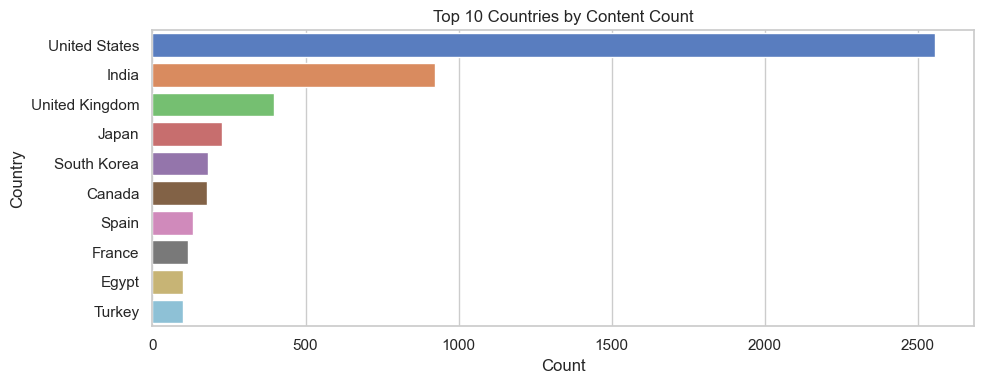

In [5]:
top_countries = df['country'].value_counts().dropna().head(10)
plt.figure(figsize=(10,4))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='muted')
plt.title('Top 10 Countries by Content Count')
plt.xlabel('Count')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

### Top 10 Genres from 'listed_in'

C:\Users\sudarshan\AppData\Local\Temp\ipykernel_15868\995635943.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(genre_counts), y=list(genres), palette='cool')


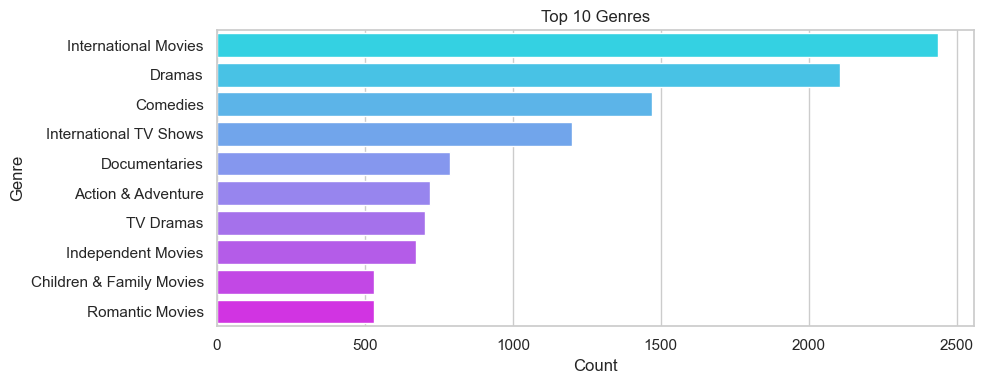

In [6]:
genre_list = df['listed_in'].dropna().apply(lambda x: x.split(', '))
all_genres = [genre for sublist in genre_list for genre in sublist]
top_genres = Counter(all_genres).most_common(10)
genres, genre_counts = zip(*top_genres)

plt.figure(figsize=(10,4))
sns.barplot(x=list(genre_counts), y=list(genres), palette='cool')
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

# 2. Data Preprocessing: 

### Step 2.1: Handle missing values 

In [9]:
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['date_added'] = df['date_added'].ffill()

print("Missing values after preprocessing:\n")
print(df.isnull().sum())

Missing values after preprocessing:

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


### Step 2.2: Extract duration as numerical

In [11]:
def extract_duration(x):
    tokens = x.split()
    if len(tokens) >= 2 and tokens[0].isdigit():
        return int(tokens[0]), tokens[1]
    return np.nan, 'Unknown'

df[['duration_int', 'duration_type']] = df['duration'].apply(lambda x: pd.Series(extract_duration(x)))

df['duration_int'] = df['duration_int'].fillna(df['duration_int'].median())

### Step 2.3: Create 'content_age' = current_year - release_year

In [12]:
current_year = 2025
df['content_age'] = current_year - df['release_year']

### Step 2.4: One-hot encode 'type', 'rating', and 'duration_type'

In [13]:
df_encoded = pd.get_dummies(df, columns=['type', 'rating', 'duration_type'], drop_first=True)

### Step 2.5: Genre count (number of genres per content)

In [14]:
df_encoded['genre_count'] = df['listed_in'].apply(lambda x: len(str(x).split(', ')))

### Step 2.6: TF-IDF Vectorization on 'listed_in' (Genres)

In [15]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
genre_tfidf = tfidf_vectorizer.fit_transform(df['listed_in'].fillna(""))

genre_tfidf_df = pd.DataFrame(genre_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

### Step 2.7: Standardize numerical features

In [16]:
scaler = StandardScaler()
num_features = df_encoded[['release_year', 'duration_int', 'content_age', 'genre_count']]
scaled_features = scaler.fit_transform(num_features)
scaled_df = pd.DataFrame(scaled_features, columns=num_features.columns)

### Final combined feature set for clustering

In [17]:
final_df = pd.concat([scaled_df, df_encoded.drop(columns=[
    'show_id', 'title', 'director', 'cast', 'country', 'date_added',
    'duration', 'listed_in', 'description', 'release_year', 'duration_int', 'content_age', 'genre_count'
]).reset_index(drop=True), genre_tfidf_df.reset_index(drop=True)], axis=1)

print("Final shape of feature set for clustering:", final_df.shape)
final_df.head()

Final shape of feature set for clustering: (7787, 64)


,release_year,duration_int,content_age,genre_count,type_TV Show,rating_NC-17,rating_NR,rating_PG,rating_PG-13,rating_R,...,series,shows,spanish,spirituality,sports,stand,talk,teen,thrillers,tv
0,0.692878,-1.278234,-0.692878,1.027634,True,False,False,False,False,False,...,0.0,0.242849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.625086
1,0.236092,0.468664,-0.236092,-0.244574,False,False,False,False,False,False,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,-0.334890,0.174243,0.334890,-0.244574,False,False,False,False,False,True,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,-0.563284,0.213499,0.563284,1.027634,False,False,False,False,True,False,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,-0.677480,1.057505,0.677480,-1.516781,False,False,False,False,True,False,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


# 3. Feature Engineering: 

In [21]:
from datetime import datetime

current_year = datetime.now().year
df['content_age'] = current_year - df['release_year']

print("Sample rows with content_age:\n")
print(df[['title', 'release_year', 'content_age']].head())

Sample rows with content_age:

   title  release_year  content_age
0     3%          2020            5
1   7:19          2016            9
2  23:59          2011           14
3      9          2009           16
4     21          2008           17


### Create 'genre_count' feature

In [22]:
df['genre_count'] = df['listed_in'].apply(lambda x: len(str(x).split(', ')))

print("\nSample rows with genre_count:\n")
print(df[['title', 'listed_in', 'genre_count']].head())


Sample rows with genre_count:

   title                                          listed_in  genre_count
0     3%  International TV Shows, TV Dramas, TV Sci-Fi &...            3
1   7:19                       Dramas, International Movies            2
2  23:59                Horror Movies, International Movies            2
3      9  Action & Adventure, Independent Movies, Sci-Fi...            3
4     21                                             Dramas            1


### One-hot encode categorical columns

In [23]:
df_encoded = pd.get_dummies(df, columns=['type', 'rating', 'duration_type'], drop_first=True)

print("\nNew columns after one-hot encoding:\n")
print([col for col in df_encoded.columns if 'type_' in col or 'rating_' in col or 'duration_type_' in col])


New columns after one-hot encoding:

['type_TV Show', 'rating_NC-17', 'rating_NR', 'rating_PG', 'rating_PG-13', 'rating_R', 'rating_TV-14', 'rating_TV-G', 'rating_TV-MA', 'rating_TV-PG', 'rating_TV-Y', 'rating_TV-Y7', 'rating_TV-Y7-FV', 'rating_UR', 'duration_type_Seasons', 'duration_type_min']


# 4. Clustering Model Selection: 

In [24]:
from sklearn.preprocessing import StandardScaler

numeric_cols = df_encoded.select_dtypes(include=['int64', 'float64', 'uint8']).columns
X = df_encoded[numeric_cols]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Shape of standardized feature matrix:", X_scaled.shape)

Shape of standardized feature matrix: (7787, 4)


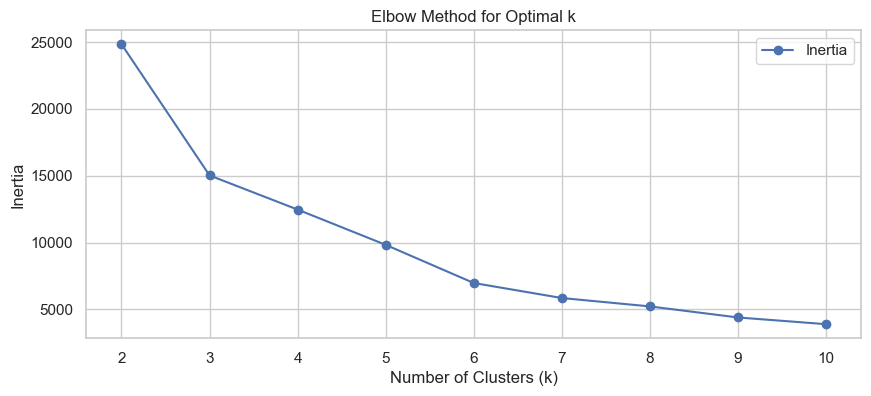

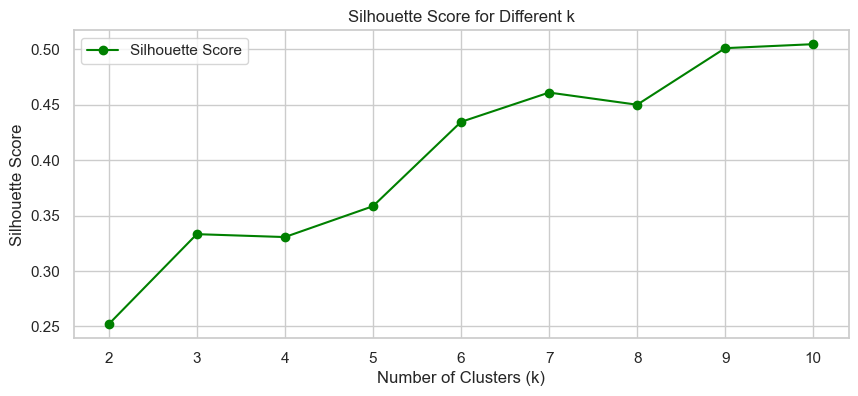

In [26]:
import os
os.environ['LOKY_MAX_CPU_COUNT'] = '4'  
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

plt.figure(figsize=(10,4))
plt.plot(k_range, inertia, marker='o', label='Inertia')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10,4))
plt.plot(k_range, silhouette_scores, marker='o', color='green', label='Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k')
plt.grid(True)
plt.legend()
plt.show()

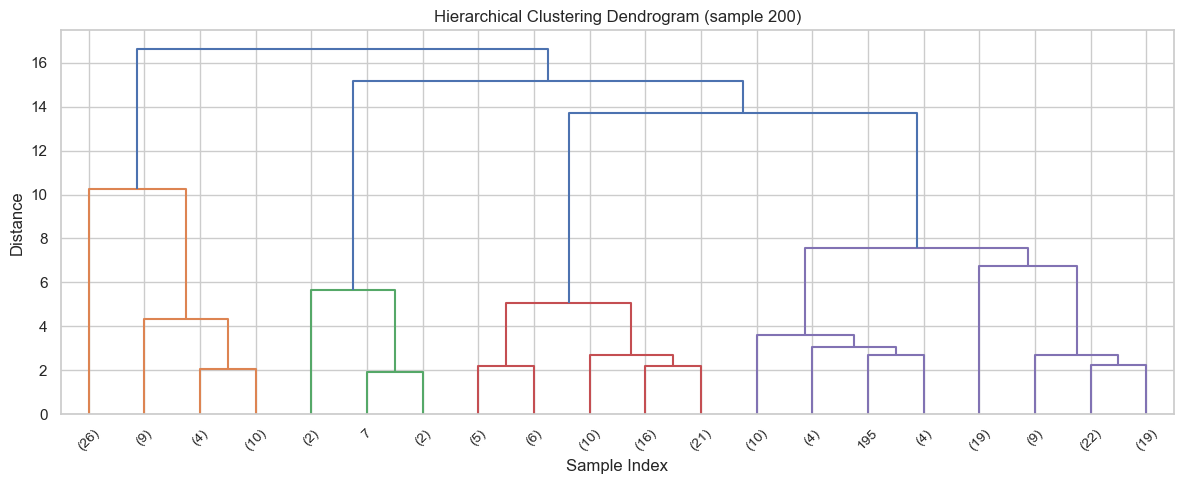

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage

sample_data = X_scaled[:200]
linked = linkage(sample_data, method='ward')

plt.figure(figsize=(12, 5))
dendrogram(linked, truncate_mode='lastp', p=20, leaf_rotation=45, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram (sample 200)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

DBSCAN with eps=0.7 and min_samples=4 found 2 clusters and 6 noise points


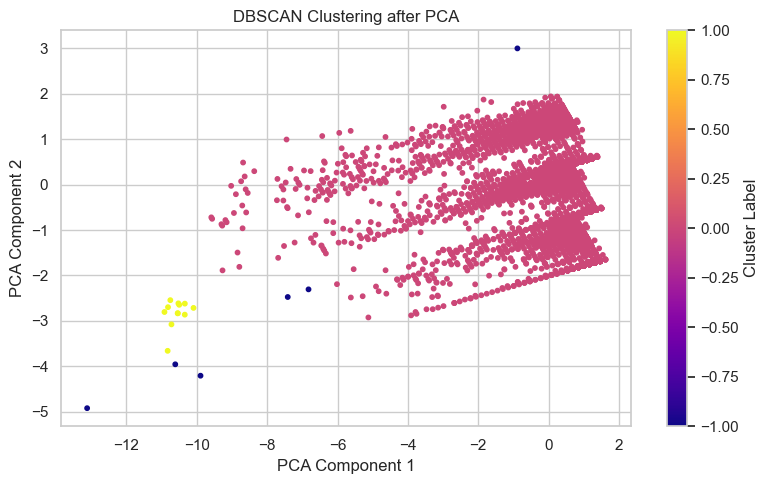

In [32]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

dbscan = DBSCAN(eps=0.7, min_samples=4)  
dbscan_labels = dbscan.fit_predict(X_pca)

n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"DBSCAN with eps=0.7 and min_samples=4 found {n_clusters} clusters and {n_noise} noise points")

plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='plasma', s=10)
plt.title('DBSCAN Clustering after PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. Model Training & Optimization: 

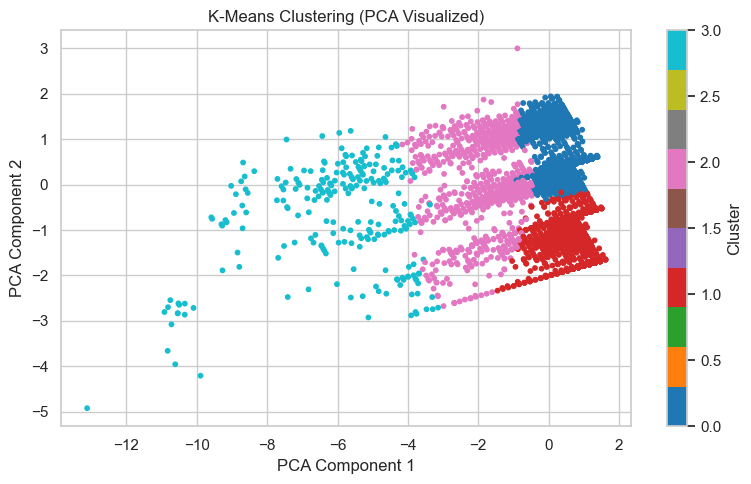

In [33]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=4, random_state=42)  
kmeans_labels = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='tab10', s=10)
plt.title('K-Means Clustering (PCA Visualized)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.grid(True)
plt.show()

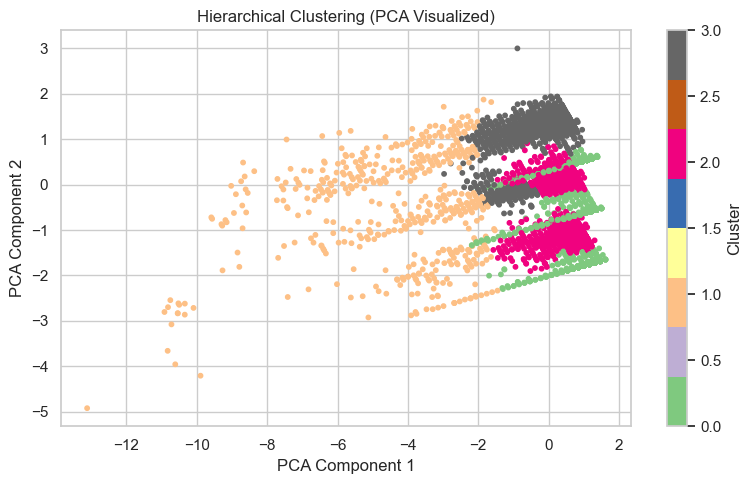

In [34]:
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(n_clusters=4, linkage='ward')
hier_labels = hierarchical.fit_predict(X_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hier_labels, cmap='Accent', s=10)
plt.title('Hierarchical Clustering (PCA Visualized)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.grid(True)
plt.show()

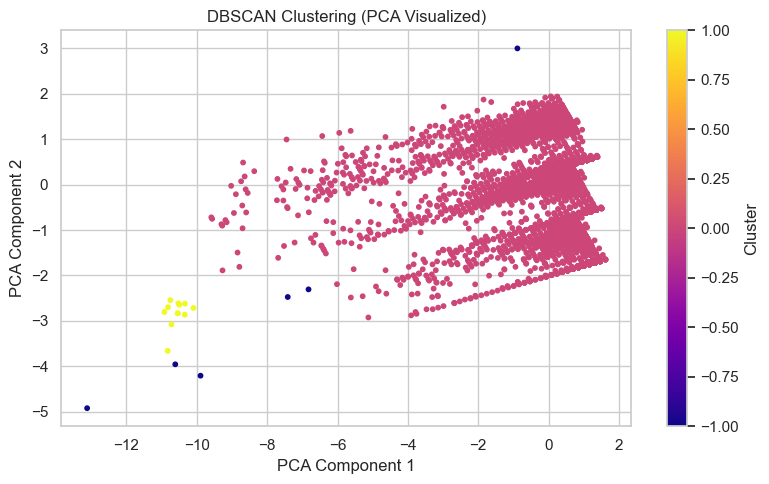

In [35]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.7, min_samples=4)
dbscan_labels = dbscan.fit_predict(X_pca)

plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='plasma', s=10)
plt.title('DBSCAN Clustering (PCA Visualized)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.grid(True)
plt.show()

# 6. Visualization & Interpretation: 

Length check → df_encoded: 7787 | kmeans_labels: 7787


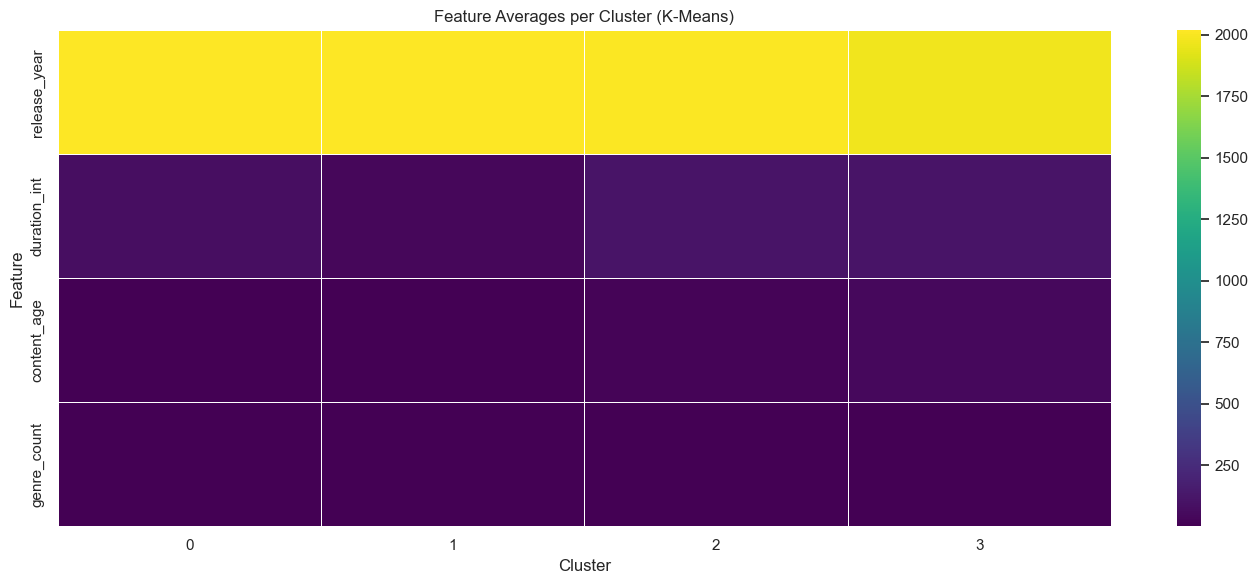

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("Length check → df_encoded:", len(df_encoded), "| kmeans_labels:", len(kmeans_labels))

numeric_df = df_encoded.select_dtypes(include=['int64', 'float64', 'uint8']).copy()
numeric_df['Cluster'] = kmeans_labels

cluster_summary = numeric_df.groupby('Cluster').mean()

plt.figure(figsize=(14, 6))
sns.heatmap(cluster_summary.T, cmap='viridis', annot=False, linewidths=0.5)
plt.title('Feature Averages per Cluster (K-Means)')
plt.ylabel('Feature')
plt.xlabel('Cluster')
plt.tight_layout()
plt.show()

C:\Users\sudarshan\AppData\Local\Temp\ipykernel_15868\2513039282.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='genre', data=top5, palette='Set2')


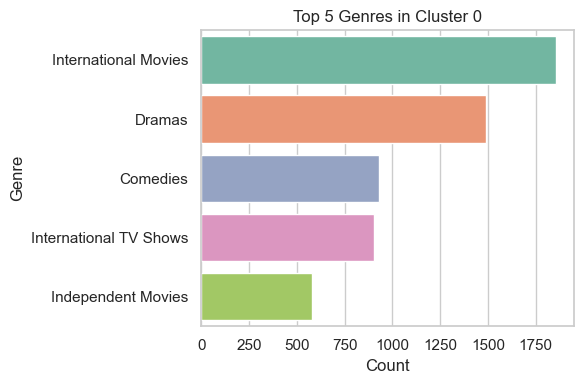

C:\Users\sudarshan\AppData\Local\Temp\ipykernel_15868\2513039282.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='genre', data=top5, palette='Set2')


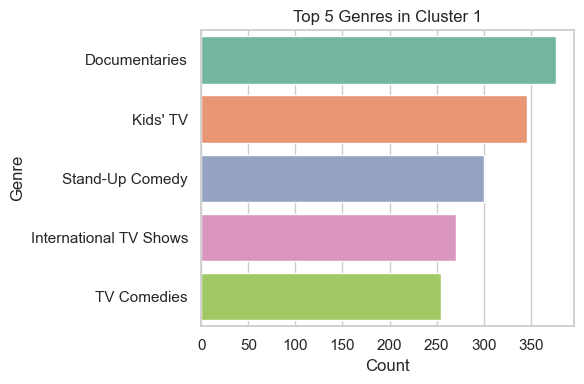

C:\Users\sudarshan\AppData\Local\Temp\ipykernel_15868\2513039282.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='genre', data=top5, palette='Set2')


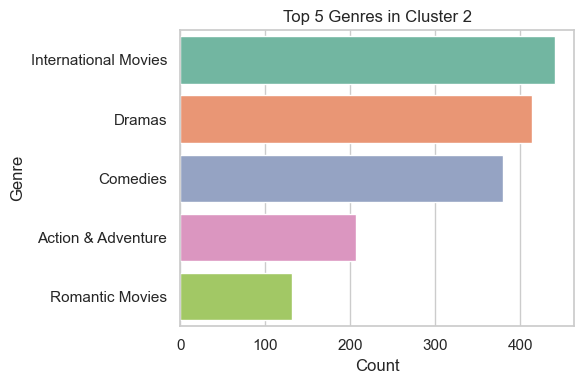

C:\Users\sudarshan\AppData\Local\Temp\ipykernel_15868\2513039282.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='genre', data=top5, palette='Set2')


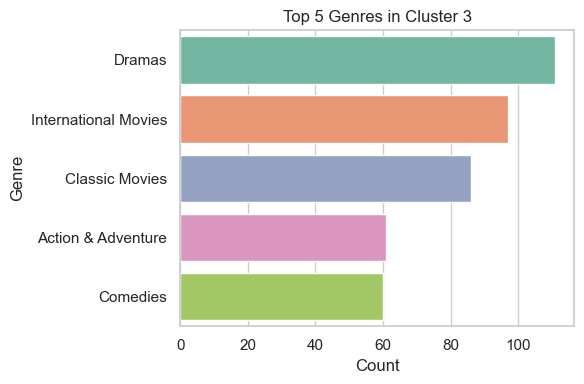

In [41]:
df['Cluster'] = kmeans_labels

df_genres = df[['Cluster', 'listed_in']].copy()
df_genres['listed_in'] = df_genres['listed_in'].fillna('Unknown')
df_genres = df_genres.assign(genre=df_genres['listed_in'].str.split(', ')).explode('genre')

top_genres_per_cluster = df_genres.groupby(['Cluster', 'genre']).size().reset_index(name='count')

for cluster_id in sorted(df['Cluster'].unique()):
    top5 = top_genres_per_cluster[top_genres_per_cluster['Cluster'] == cluster_id].nlargest(5, 'count')
    
    plt.figure(figsize=(6, 4))
    sns.barplot(x='count', y='genre', data=top5, palette='Set2')
    plt.title(f"Top 5 Genres in Cluster {cluster_id}")
    plt.xlabel('Count')
    plt.ylabel('Genre')
    plt.tight_layout()
    plt.show()

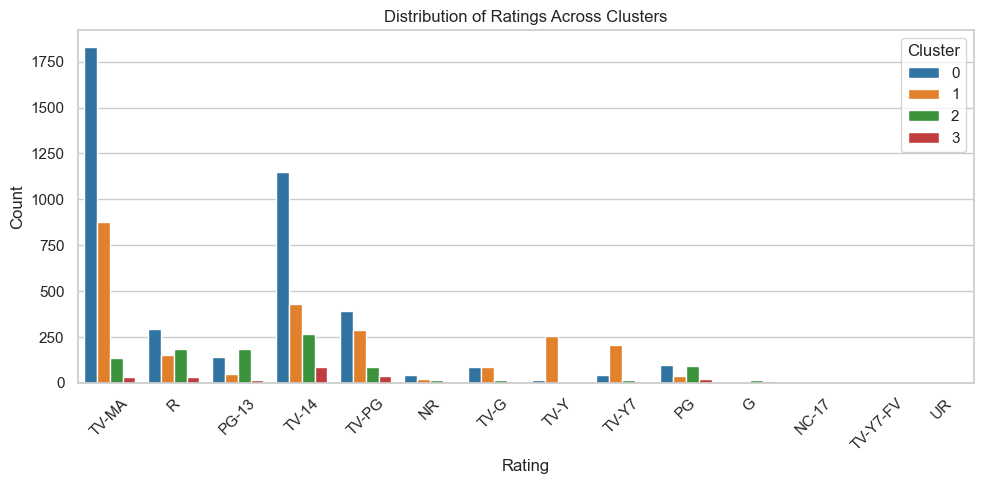

In [42]:
df_rating = df[['Cluster', 'rating']].copy()

plt.figure(figsize=(10, 5))
sns.countplot(data=df_rating, x='rating', hue='Cluster', palette='tab10')
plt.title('Distribution of Ratings Across Clusters')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7. Evaluation & Refinement: 

In [43]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette:.3f}")

kmeans_db_index = davies_bouldin_score(X_scaled, kmeans_labels)
print(f"K-Means Davies-Bouldin Index: {kmeans_db_index:.3f}")

print(f"K-Means Inertia: {kmeans.inertia_:.3f}")

K-Means Silhouette Score: 0.331
K-Means Davies-Bouldin Index: 1.076
K-Means Inertia: 12466.418


In [44]:
hier_silhouette = silhouette_score(X_scaled, hier_labels)
hier_db_index = davies_bouldin_score(X_scaled, hier_labels)

print(f"Hierarchical Silhouette Score: {hier_silhouette:.3f}")
print(f"Hierarchical Davies-Bouldin Index: {hier_db_index:.3f}")

Hierarchical Silhouette Score: 0.377
Hierarchical Davies-Bouldin Index: 0.923


In [45]:
if len(set(dbscan_labels)) > 1 and -1 in dbscan_labels:
    filtered_X = X_scaled[dbscan_labels != -1]
    filtered_labels = dbscan_labels[dbscan_labels != -1]
    
    dbscan_silhouette = silhouette_score(filtered_X, filtered_labels)
    dbscan_db_index = davies_bouldin_score(filtered_X, filtered_labels)

    print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.3f}")
    print(f"DBSCAN Davies-Bouldin Index: {dbscan_db_index:.3f}")
else:
    print("DBSCAN did not find valid clusters to evaluate.")

DBSCAN Silhouette Score: 0.780
DBSCAN Davies-Bouldin Index: 0.190


In [47]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
import pandas as pd

kmeans_sil = silhouette_score(X_scaled, kmeans_labels)
kmeans_db = davies_bouldin_score(X_scaled, kmeans_labels)
kmeans_inertia = kmeans.inertia_

hier_sil = silhouette_score(X_scaled, hier_labels)
hier_db = davies_bouldin_score(X_scaled, hier_labels)

if len(set(dbscan_labels)) > 1 and -1 in dbscan_labels:
    filtered_X = X_scaled[dbscan_labels != -1]
    filtered_labels = dbscan_labels[dbscan_labels != -1]
    
    dbscan_sil = silhouette_score(filtered_X, filtered_labels)
    dbscan_db = davies_bouldin_score(filtered_X, filtered_labels)
else:
    dbscan_sil = None
    dbscan_db = None

comparison_df = pd.DataFrame({
    'Model': ['K-Means', 'Hierarchical', 'DBSCAN'],
    'Silhouette Score': [kmeans_sil, hier_sil, dbscan_sil],
    'Davies-Bouldin Index': [kmeans_db, hier_db, dbscan_db],
    'Inertia (only for KMeans)': [kmeans_inertia, None, None]
})

print(comparison_df)

          Model  Silhouette Score  Davies-Bouldin Index  \
0       K-Means          0.330620              1.076057   
1  Hierarchical          0.376664              0.923306   
2        DBSCAN          0.780425              0.189977   

   Inertia (only for KMeans)  
0               12466.417741  
1                        NaN  
2                        NaN  


C:\Users\sudarshan\AppData\Local\Temp\ipykernel_15868\3585199070.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Silhouette Score', data=comparison_df, palette='viridis')


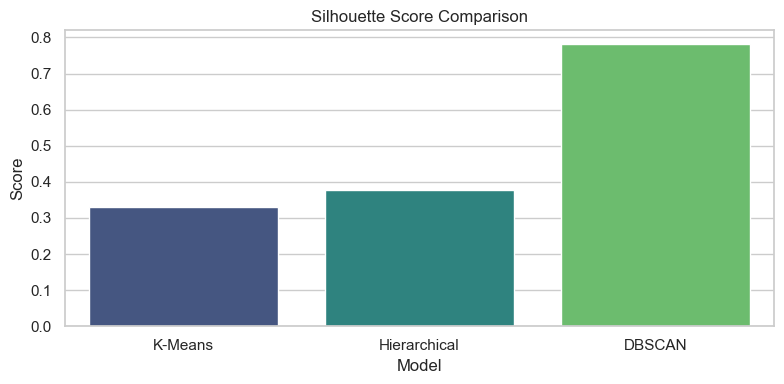

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.barplot(x='Model', y='Silhouette Score', data=comparison_df, palette='viridis')
plt.title('Silhouette Score Comparison')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

C:\Users\sudarshan\AppData\Local\Temp\ipykernel_15868\1107962294.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Davies-Bouldin Index', data=comparison_df, palette='magma')


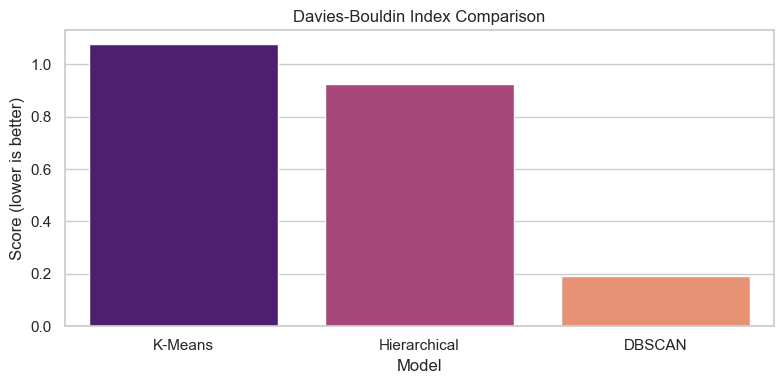

In [49]:
plt.figure(figsize=(8, 4))
sns.barplot(x='Model', y='Davies-Bouldin Index', data=comparison_df, palette='magma')
plt.title('Davies-Bouldin Index Comparison')
plt.ylabel('Score (lower is better)')
plt.tight_layout()
plt.show()